# Temporal Distribution of Population from Spain and Foreigner

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [4]:
# Load data
dataPath_esp = '../data/processed/neighborhood_population_summary.csv'
data_esp = pd.read_csv(dataPath_esp)
# Aggregate
summary = data_esp.groupby('Year_Reference', as_index=False).agg({'spain_population':'sum',
                                                                  'outside_spain':'sum'})

#Calculate percentages
summary['total_population'] = summary['spain_population'] + summary['outside_spain']
summary['spain_pct'] = (summary['spain_population'] / summary['total_population']) * 100
summary['outside_pct'] = (summary['outside_spain'] / summary['total_population']) * 100

/var/folders/02/v80wkxvx5h353nfck_r_wgzc0000gn/T/ipykernel_65009/938889598.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cividis = cm.get_cmap("cividis")


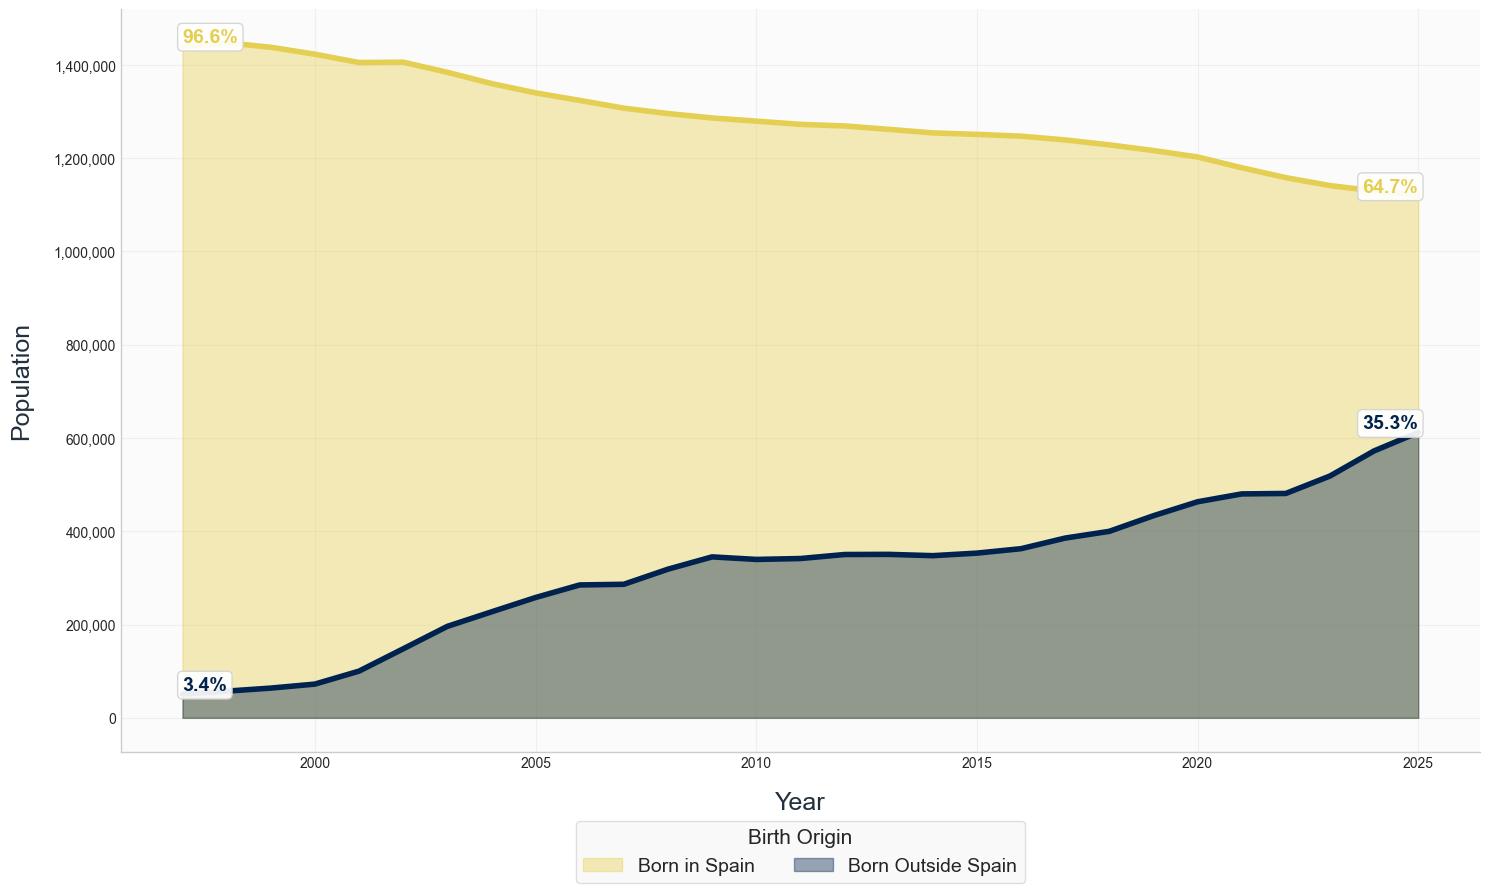

In [13]:
plt.style.use("seaborn-v0_8-whitegrid")

# Use Cividis palette (dark → bright)
cividis = cm.get_cmap("cividis")
COLOR_SPAIN = cividis(0.9)     # dark greenish/indigo
COLOR_OUTSIDE = cividis(0)   # bright yellow-green

fig, ax = plt.subplots(figsize=(15, 9))
ax.set_facecolor("#FBFBFB")

# === AREA PLOTS ===
ax.fill_between(
    summary["Year_Reference"],
    summary["spain_population"],
    color=COLOR_SPAIN,
    alpha=0.40,
    label="Born in Spain"
)

ax.fill_between(
    summary["Year_Reference"],
    summary["outside_spain"],
    color=COLOR_OUTSIDE,
    alpha=0.40,
    label="Born Outside Spain"
)

# === LINES ON TOP (crisp and smooth) ===
ax.plot(
    summary["Year_Reference"],
    summary["spain_population"],
    color=COLOR_SPAIN,
    lw=4
)

ax.plot(
    summary["Year_Reference"],
    summary["outside_spain"],
    color=COLOR_OUTSIDE,
    lw=4
)

# ===  LABELS ===


ax.set_xlabel("Year", fontsize=18, labelpad=15, color="#23313F")
ax.set_ylabel("Population", fontsize=18, labelpad=15, color="#23313F")

ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, p: f"{x:,.0f}")
)

# === GRID ===
ax.grid(True, which="major", linestyle="-", alpha=0.25)

# === REMOVE SPINES ===
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# === PERCENT LABELS (1997 & 2025) ===

# Compute % share
summary["spain_pct"] = summary["spain_population"] / (
    summary["spain_population"] + summary["outside_spain"]
) * 100
summary["outside_pct"] = 100 - summary["spain_pct"]

first_year = summary["Year_Reference"].min()
last_year = summary["Year_Reference"].max()

first = summary[summary["Year_Reference"] == first_year].iloc[0]
last = summary[summary["Year_Reference"] == last_year].iloc[0]

# Left side (1997)
ax.text(
    first_year, first["spain_population"],
    f"{first['spain_pct']:.1f}%",
    fontsize=14, fontweight="bold",
    color=COLOR_SPAIN,
    bbox=dict(facecolor="white", alpha=0.92, edgecolor="lightgray", boxstyle="round,pad=0.25"),
    ha="left", va="bottom"
)

ax.text(
    first_year, first["outside_spain"],
    f"{first['outside_pct']:.1f}%",
    fontsize=14, fontweight="bold",
    color=COLOR_OUTSIDE,
    bbox=dict(facecolor="white", alpha=0.92, edgecolor="lightgray", boxstyle="round,pad=0.25"),
    ha="left", va="bottom"
)

# Right side (2025)
ax.text(
    last_year, last["spain_population"],
    f"{last['spain_pct']:.1f}%",
    fontsize=14, fontweight="bold",
    color=COLOR_SPAIN,
    bbox=dict(facecolor="white", alpha=0.92, edgecolor="lightgray", boxstyle="round,pad=0.25"),
    ha="right", va="bottom"
)

ax.text(
    last_year, last["outside_spain"],
    f"{last['outside_pct']:.1f}%",
    fontsize=14, fontweight="bold",
    color=COLOR_OUTSIDE,
    bbox=dict(facecolor="white", alpha=0.92, edgecolor="lightgray", boxstyle="round,pad=0.25"),
    ha="right", va="bottom"
)

# === STYLISH LEGEND ===
legend = ax.legend(
    title="Birth Origin",
    fontsize=14,
    title_fontsize=15,
    frameon=True,
    fancybox=True,
    shadow=False,
    framealpha=0.95,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.08),
    ncol=2,
)

legend.get_frame().set_facecolor("#F9F9F9")
legend.get_frame().set_edgecolor("#DDDDDD")

plt.tight_layout()

plt.savefig("../data/outputs/good/enhanced_population_cividis.png",
            dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


Bigger font in the axis for the presentation:

/var/folders/02/v80wkxvx5h353nfck_r_wgzc0000gn/T/ipykernel_65009/35689775.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap("viridis")


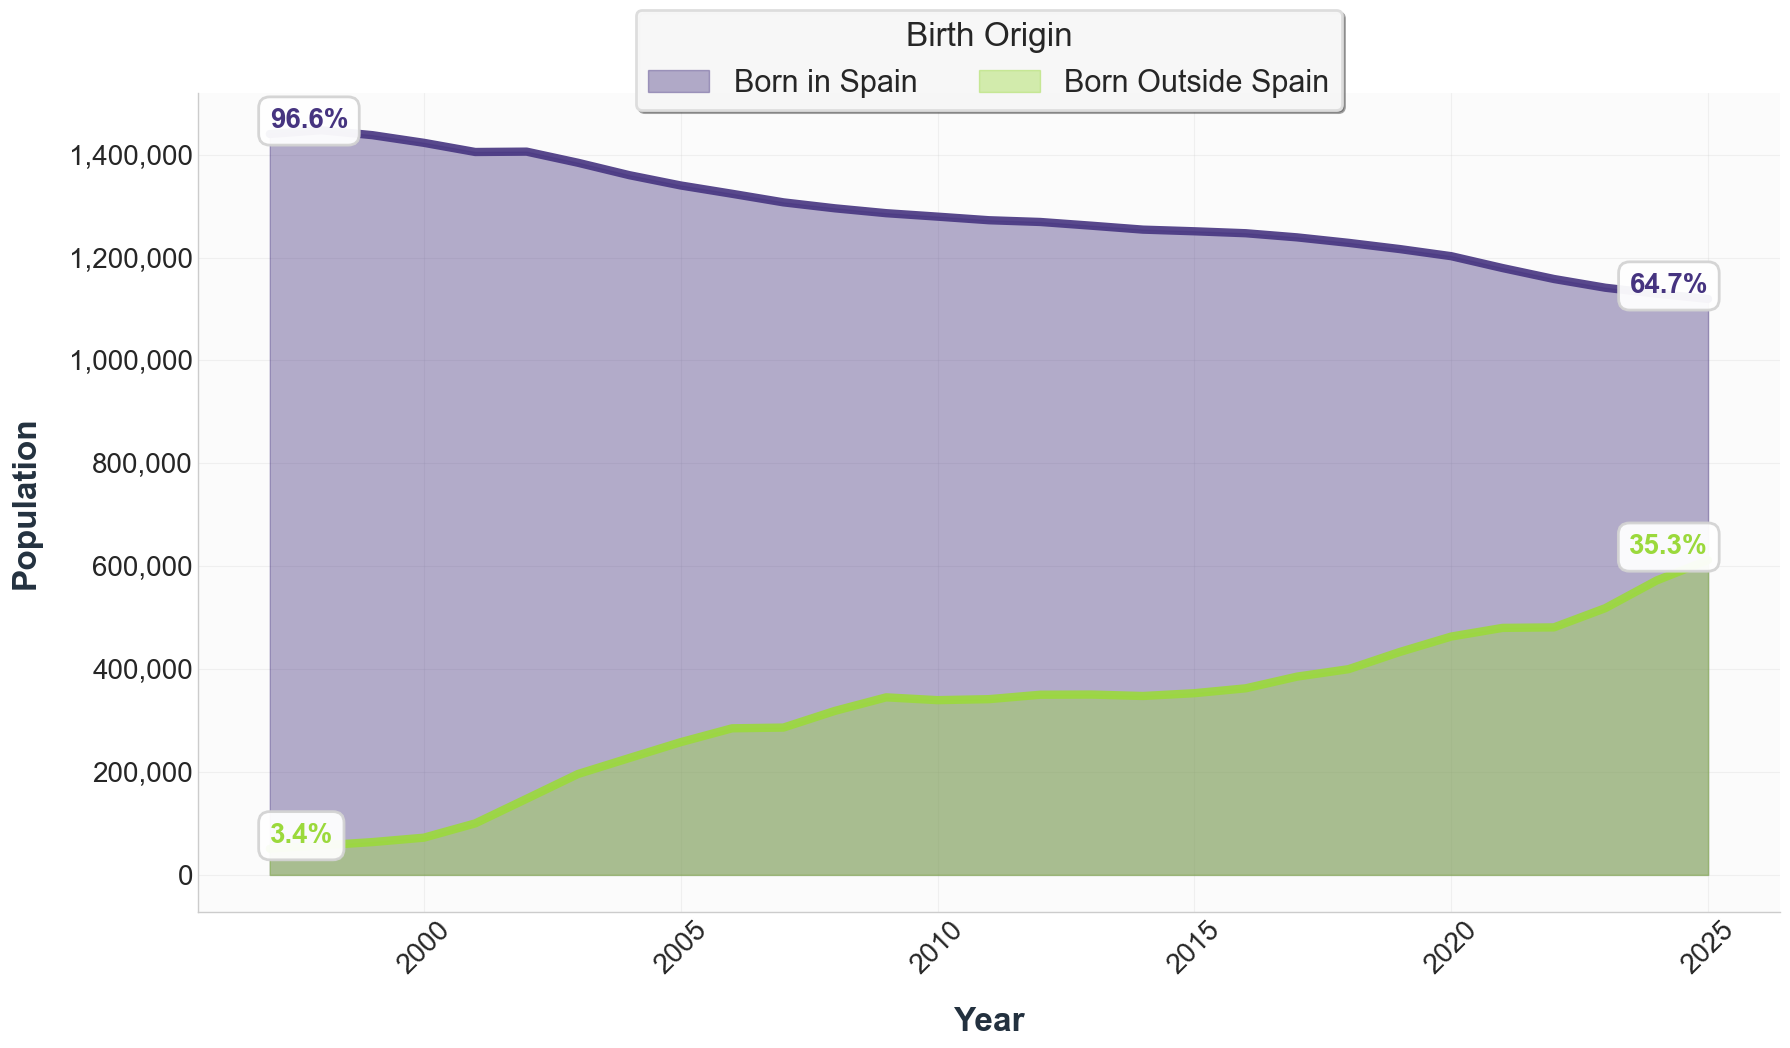

In [11]:

plt.style.use("seaborn-v0_8-whitegrid")

# Use Viridis palette (dark → bright)
viridis = cm.get_cmap("viridis")
COLOR_SPAIN = viridis(0.15)     # dark greenish/indigo
COLOR_OUTSIDE = viridis(0.85)   # bright yellow-green

# Increase figure size for better visibility on slides
fig, ax = plt.subplots(figsize=(18, 12))
ax.set_facecolor("#FBFBFB")

# === AREA PLOTS ===
ax.fill_between(
    summary["Year_Reference"],
    summary["spain_population"],
    color=COLOR_SPAIN,
    alpha=0.40,
    label="Born in Spain"
)

ax.fill_between(
    summary["Year_Reference"],
    summary["outside_spain"],
    color=COLOR_OUTSIDE,
    alpha=0.40,
    label="Born Outside Spain"
)

# === LINES ON TOP (crisp and smooth) ===
ax.plot(
    summary["Year_Reference"],
    summary["spain_population"],
    color=COLOR_SPAIN,
    lw=6,  # Thicker lines for visibility
    alpha=0.9
)

ax.plot(
    summary["Year_Reference"],
    summary["outside_spain"],
    color=COLOR_OUTSIDE,
    lw=6,  # Thicker lines for visibility
    alpha=0.9
)

# === INCREASED FONT SIZES FOR BETTER READABILITY ===
ax.set_xlabel("Year", fontsize=24, labelpad=20, color="#23313F", fontweight='bold')
ax.set_ylabel("Population", fontsize=24, labelpad=20, color="#23313F", fontweight='bold')

# Increase tick label sizes
ax.tick_params(axis='x', labelsize=20, rotation=45)
ax.tick_params(axis='y', labelsize=20)

ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, p: f"{x:,.0f}")
)

# === GRID ===
ax.grid(True, which="major", linestyle="-", alpha=0.25)

# === REMOVE SPINES ===
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# === PERCENT LABELS (1997 & 2025) - INCREASED SIZE ===

# Compute % share
summary["spain_pct"] = summary["spain_population"] / (
    summary["spain_population"] + summary["outside_spain"]
) * 100
summary["outside_pct"] = 100 - summary["spain_pct"]

first_year = summary["Year_Reference"].min()
last_year = summary["Year_Reference"].max()

first = summary[summary["Year_Reference"] == first_year].iloc[0]
last = summary[summary["Year_Reference"] == last_year].iloc[0]

# Left side (1997) - Larger font sizes
ax.text(
    first_year, first["spain_population"],
    f"{first['spain_pct']:.1f}%",
    fontsize=20, fontweight="bold",  # Increased from 14 to 20
    color=COLOR_SPAIN,
    bbox=dict(facecolor="white", alpha=0.95, edgecolor="lightgray", boxstyle="round,pad=0.4", linewidth=2),
    ha="left", va="bottom"
)

ax.text(
    first_year, first["outside_spain"],
    f"{first['outside_pct']:.1f}%",
    fontsize=20, fontweight="bold",  # Increased from 14 to 20
    color=COLOR_OUTSIDE,
    bbox=dict(facecolor="white", alpha=0.95, edgecolor="lightgray", boxstyle="round,pad=0.4", linewidth=2),
    ha="left", va="bottom"
)

# Right side (2025) - Larger font sizes
ax.text(
    last_year, last["spain_population"],
    f"{last['spain_pct']:.1f}%",
    fontsize=20, fontweight="bold",  # Increased from 14 to 20
    color=COLOR_SPAIN,
    bbox=dict(facecolor="white", alpha=0.95, edgecolor="lightgray", boxstyle="round,pad=0.4", linewidth=2),
    ha="right", va="bottom"
)

ax.text(
    last_year, last["outside_spain"],
    f"{last['outside_pct']:.1f}%",
    fontsize=20, fontweight="bold",  # Increased from 14 to 20
    color=COLOR_OUTSIDE,
    bbox=dict(facecolor="white", alpha=0.95, edgecolor="lightgray", boxstyle="round,pad=0.4", linewidth=2),
    ha="right", va="bottom"
)

# Legend
legend = ax.legend(
    title="Birth Origin",
    fontsize=22,           # bigger for slides
    title_fontsize=24,     # bigger for slides
    frameon=True,
    fancybox=True,
    shadow=True,
    framealpha=0.98,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.12),  # place above the axes
    ncol=2,
)

legend.get_frame().set_facecolor("#F9F9F9")
legend.get_frame().set_edgecolor("#DDDDDD")
legend.get_frame().set_linewidth(2.0)

plt.tight_layout()
plt.subplots_adjust(top=0.80)  # ensure space for the bigger legend


# Save with higher DPI for presentation quality
plt.savefig("../data/outputs/good/enhanced_population_viridis_presentation.png",
            dpi=350, bbox_inches="tight", facecolor="white")

plt.show()